<a href="https://colab.research.google.com/github/Sursuri69/Machine-Learning-LAB/blob/main/practical-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# Display first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check for missing values
print(df.isnull().sum())

# Splitting data into features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Splitting into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize Bagging with Decision Tree
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {bagging_accuracy:.4f}")


Bagging Accuracy: 0.7468


In [9]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with Decision Tree
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")


AdaBoost Accuracy: 0.7792


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the model
gradient_boost_model.fit(X_train, y_train)

# Make predictions
y_pred_gradient_boost = gradient_boost_model.predict(X_test)

# Evaluate the model
gradient_boost_accuracy = accuracy_score(y_test, y_pred_gradient_boost)
print(f"Gradient Boosting Accuracy: {gradient_boost_accuracy:.4f}")


Gradient Boosting Accuracy: 0.7662


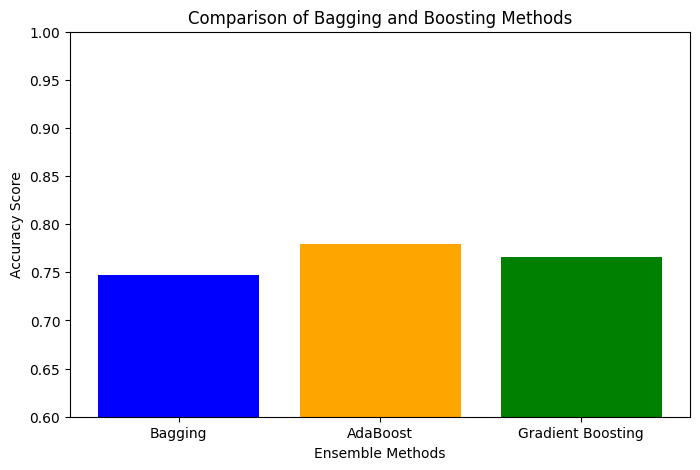

In [11]:
import matplotlib.pyplot as plt

# Compare the accuracy scores
models = ["Bagging", "AdaBoost", "Gradient Boosting"]
accuracies = [bagging_accuracy, adaboost_accuracy, gradient_boost_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel("Ensemble Methods")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Bagging and Boosting Methods")
plt.ylim(0.6, 1)
plt.show()


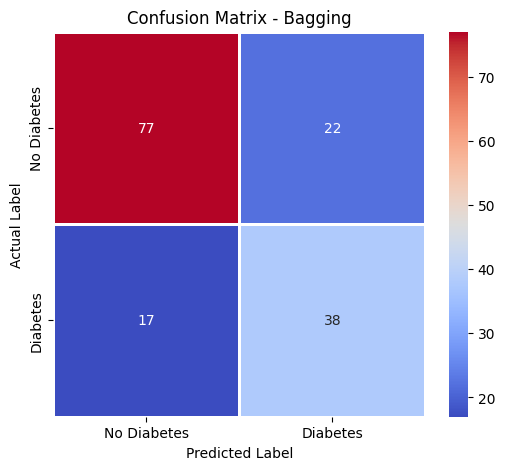

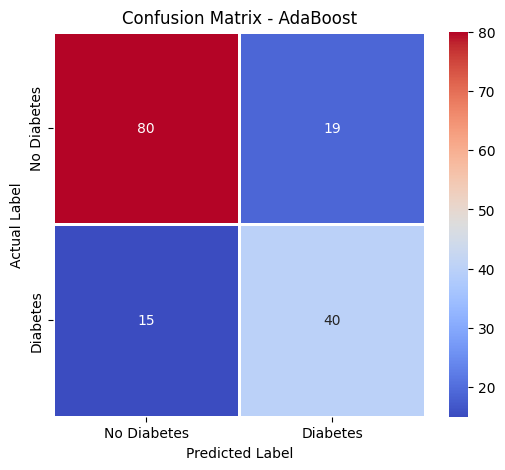

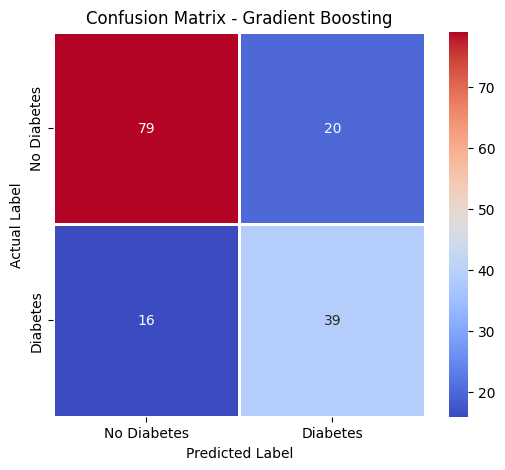

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, title):
    """Plots a colored confusion matrix with labels."""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=1,
                xticklabels=["No Diabetes", "Diabetes"],
                yticklabels=["No Diabetes", "Diabetes"])

    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_bagging, "Confusion Matrix - Bagging")

plot_confusion_matrix(y_test, y_pred_adaboost, "Confusion Matrix - AdaBoost")

plot_confusion_matrix(y_test, y_pred_gradient_boost, "Confusion Matrix - Gradient Boosting")

